# 고객 세분화를 통한 마케팅 전략 수립

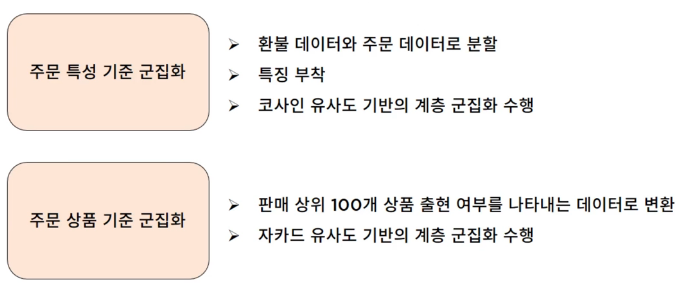

### 주문 특성 기준 군집화(1) - 데이터 분할
     - 해당 데이터는 주문 데이터와 환불 데이터가 동시에 포함되어 있음
     - 환불 데이터는 주문 수량이 음수라는 특징이 있어, 데이터 분할하는데 활용 
     
     
### 주문 특성 기준 군집화(2)  - 특징 추출
     - 군집화 데이터를 유니크한 고객 ID 컬럼만 있는 데이터프레임으로 초기화
     - 주문/반품 횟수 계산 및 부착 : 고객 ID와 주문 ID를 기준으로 중복을 제거하는 방식
                                     유니크한 고객 ID, 주문 ID`를 추출한 뒤, 추출한 데이터에서 고객 ID 수를 카운트
     - 주문량 계산 및 부착 : 고객 ID에 따른 주문량 합계를 계산
     - 주문 금액 계산 및 부착 : 주문량과 단가를 곱하여 주문 금액 계산한 뒤, 고객 ID에 따른 주문 금액의 합계를 계산
     - 최근성 계산 및 부착 : 현재 날짜에서 주문 날짜의 차이를 뺀 뒤, 고객별 해당 값의 최소 값을 계산
     
     
### 주문 특성 기준 군집화(3) - 코사인 유사도 기반의 계층 군집화 수행

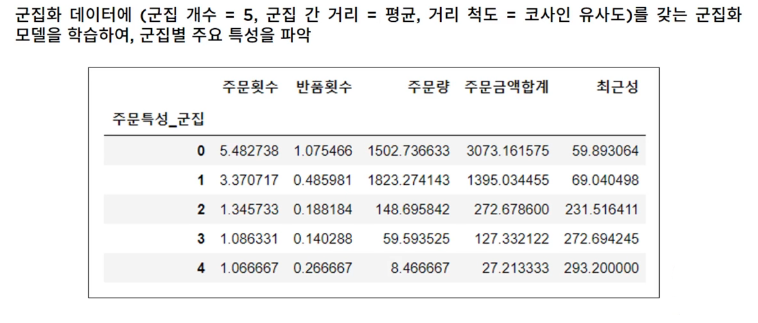


### 주문 상품 기준 군집화
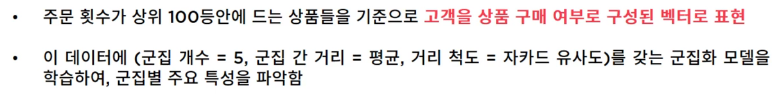
     
                                

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
os.listdir('data')

['2018-20_코스피지수.xlsx',
 'AB테스트',
 'E-Commerce_UK.csv',
 'Instacart Market Basket Analysis.csv',
 'Telco_customer_info.csv',
 '고객여정.csv',
 '다이어트약_효과검증.csv',
 '반별_점수_type1.csv',
 '반별_점수_type2.csv',
 '베스트셀러_도서구매기록.txt',
 '성별에따른만족도.csv',
 '성인여성_키_데이터.txt',
 '연관규칙탐사결과.csv',
 '일별_금은달러.xlsx',
 '지점별_일별판매량.csv',
 '페이지내_사용자_이동.csv']

---

#### 1. 주문 특성 기준 군집화(1) : 데이터 분할

In [3]:
data = pd.read_csv('data/E-Commerce_UK.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,C-17850
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,C-17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,C-17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,C-17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,C-17850
...,...,...,...,...,...,...,...
539387,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,C-12680
539388,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,C-12680
539389,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,C-12680
539390,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,C-12680


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539392 entries, 0 to 539391
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539392 non-null  object 
 1   StockCode    539392 non-null  object 
 2   Description  539392 non-null  object 
 3   Quantity     539392 non-null  int64  
 4   InvoiceDate  539392 non-null  object 
 5   UnitPrice    539392 non-null  float64
 6   CustomerID   539392 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.8+ MB


In [5]:
data.describe()

,Quantity,UnitPrice
count,539392.000000,539392.000000
mean,9.845904,4.673648
std,215.412652,94.614722
min,-80995.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [7]:
# 데이터 분할

refund_df = data.loc[data['Quantity'] <= 0] # 환불 데이터
order_df = data.loc[data['Quantity'] >= 0] # 주문 데이터

In [8]:
refund_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,C-14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,C-15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,C-17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,C-17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,C-17548
...,...,...,...,...,...,...,...
537932,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,C-14397
539024,C581499,M,Manual,-1,12/9/2011 10:28,224.69,C-15498
539198,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,C-15311
539199,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,C-17315


In [9]:
order_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,C-17850
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,C-17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,C-17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,C-17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,C-17850
...,...,...,...,...,...,...,...
539387,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,C-12680
539388,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,C-12680
539389,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,C-12680
539390,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,C-12680


---

#### 1. 주문 특성 기준 군집화(2) : 고객별 특징 추출

In [10]:
# 클러스터링을 위한 데이터 초기화

cluster_df = pd.DataFrame({'CustomerID': order_df['CustomerID'].unique()})
cluster_df

,CustomerID
0,C-17850
1,C-13047
2,C-12583
3,C-13748
4,C-15100
...,...
4339,C-13436
4340,C-15520
4341,C-13298
4342,C-14569


In [11]:
# (1) 주문 횟수 계산 및 부착

order_number = order_df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])['CustomerID'].value_counts()
cluster_df['주문횟수'] = cluster_df['CustomerID'].replace(order_number.to_dict())

# 주문 횟수가 0인 경우 replace가 되지 않아 customerID가 부착될 수도 있음

cluster_df.loc[cluster_df['CustomerID'] == cluster_df['주문횟수'], '주문횟수'] = 0
cluster_df

,CustomerID,주문횟수
0,C-17850,34
1,C-13047,21
2,C-12583,15
3,C-13748,5
4,C-15100,4
...,...,...
4339,C-13436,1
4340,C-15520,1
4341,C-13298,1
4342,C-14569,1


In [12]:
cluster_df['주문횟수']

0       34
1       21
2       15
3        5
4        4
        ..
4339     1
4340     1
4341     1
4342     1
4343     1
Name: 주문횟수, Length: 4344, dtype: int64

In [13]:
# (2) 반품 횟수 계산 및 부착

refund_number = refund_df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])['CustomerID'].value_counts()

cluster_df['반품횟수'] = cluster_df['CustomerID'].replace(refund_number.to_dict())
cluster_df

,CustomerID,주문횟수,반품횟수
0,C-17850,34,1
1,C-13047,21,8
2,C-12583,15,3
3,C-13748,5,C-13748
4,C-15100,4,3
...,...,...,...
4339,C-13436,1,C-13436
4340,C-15520,1,C-15520
4341,C-13298,1,C-13298
4342,C-14569,1,C-14569


In [14]:
# 주문 횟수가 0인 경우 replace가 되지 않아 customerID가 부착될 수도 있음

cluster_df.loc[cluster_df['CustomerID'] == cluster_df['반품횟수'], '반품횟수'] = 0
cluster_df

,CustomerID,주문횟수,반품횟수
0,C-17850,34,1
1,C-13047,21,8
2,C-12583,15,3
3,C-13748,5,0
4,C-15100,4,3
...,...,...,...
4339,C-13436,1,0
4340,C-15520,1,0
4341,C-13298,1,0
4342,C-14569,1,0


In [15]:
# (3) 주문량 계산 및 부착

order_Quantity = order_df.groupby('CustomerID')['Quantity'].sum()

cluster_df['주문량'] = cluster_df['CustomerID'].replace(order_Quantity.to_dict())
cluster_df.loc[cluster_df['CustomerID']== cluster_df['주문량'], '주문량'] = 0
cluster_df

,CustomerID,주문횟수,반품횟수,주문량
0,C-17850,34,1,1733
1,C-13047,21,8,1953
2,C-12583,15,3,5060
3,C-13748,5,0,439
4,C-15100,4,3,81
...,...,...,...,...
4339,C-13436,1,0,76
4340,C-15520,1,0,314
4341,C-13298,1,0,96
4342,C-14569,1,0,79


In [16]:
# (4) 주문금액 합계 계산 및 부착

order_df.loc[:, '주문금액'] = order_df.loc[:, 'Quantity'] * order_df.loc[:, 'UnitPrice']
order_df

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,주문금액
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,C-17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,C-17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,C-17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,C-17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,C-17850,20.34
...,...,...,...,...,...,...,...,...
539387,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,C-12680,10.20
539388,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,C-12680,12.60
539389,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,C-12680,16.60
539390,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,C-12680,16.60


In [17]:
order_money_all = order_df.groupby('CustomerID')['주문금액'].sum()

cluster_df['주문금액'] = cluster_df['CustomerID'].replace(order_money_all.to_dict())
cluster_df.loc[cluster_df['CustomerID'] == cluster_df['주문금액'], '주문금액'] = 0
cluster_df

,CustomerID,주문횟수,반품횟수,주문량,주문금액
0,C-17850,34,1,1733,5391.21
1,C-13047,21,8,1953,6619.51
2,C-12583,15,3,5060,7281.38
3,C-13748,5,0,439,948.25
4,C-15100,4,3,81,877.25
...,...,...,...,...,...
4339,C-13436,1,0,76,196.89
4340,C-15520,1,0,314,343.50
4341,C-13298,1,0,96,360.00
4342,C-14569,1,0,79,227.39


In [18]:
# 최근 주문 ~ 현재 시점까지 거리 부착

current_date = pd.to_datetime('2011-12-10')

def recency(value):
    month, day, year = value.split(' ')[0].split('/')
    diff = (current_date - pd.to_datetime('{}-{}-{}'.format(year, month, day))).days
    return diff

In [19]:
# keep = last를 통해, 계산량 감소 (중복 날짜 제거)

order_df_day = order_df.drop_duplicates(subset=['CustomerID', 'InvoiceDate'], keep='last')[['CustomerID', 'InvoiceDate']]
order_df_day['최근성'] = order_df_day['InvoiceDate'].apply(recency)
order_df_day

,CustomerID,InvoiceDate,최근성
6,C-17850,12/1/2010 8:26,374
8,C-17850,12/1/2010 8:28,374
24,C-13047,12/1/2010 8:34,374
25,C-13047,12/1/2010 8:35,374
45,C-12583,12/1/2010 8:45,374
...,...,...,...
539349,C-13777,12/9/2011 12:23,1
539351,C-13777,12/9/2011 12:25,1
539372,C-15804,12/9/2011 12:31,1
539376,C-13113,12/9/2011 12:49,1


In [20]:
min_recency = order_df_day.set_index('CustomerID')['최근성']
cluster_df['최근성'] = cluster_df['CustomerID'].replace(min_recency.to_dict())
cluster_df

,CustomerID,주문횟수,반품횟수,주문량,주문금액,최근성
0,C-17850,34,1,1733,5391.21,373
1,C-13047,21,8,1953,6619.51,32
2,C-12583,15,3,5060,7281.38,3
3,C-13748,5,0,439,948.25,96
4,C-15100,4,3,81,877.25,331
...,...,...,...,...,...,...
4339,C-13436,1,0,76,196.89,2
4340,C-15520,1,0,314,343.50,2
4341,C-13298,1,0,96,360.00,2
4342,C-14569,1,0,79,227.39,2


In [21]:
cluster_df.set_index('CustomerID', inplace=True)
cluster_df

,주문횟수,반품횟수,주문량,주문금액,최근성
CustomerID,,,,,
C-17850,34,1,1733,5391.21,373
C-13047,21,8,1953,6619.51,32
C-12583,15,3,5060,7281.38,3
C-13748,5,0,439,948.25,96
C-15100,4,3,81,877.25,331
...,...,...,...,...,...
C-13436,1,0,76,196.89,2
C-15520,1,0,314,343.50,2
C-13298,1,0,96,360.00,2


---

#### 1. 주문 특성 기준 군집화(3) : 고객의 주문 특성에 따른 군집화 수행

In [22]:
# 군집화 모델 인스턴스화 및 학습

from sklearn.cluster import AgglomerativeClustering as AC

clustering_model = AC(n_clusters = 5,
                      affinity = 'cosine',
                      linkage = 'average'
                     )

clustering_model.fit(cluster_df)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=5)

In [23]:
cluster_df['주문특성_군집'] = clustering_model.labels_
cluster_df.head()

,주문횟수,반품횟수,주문량,주문금액,최근성,주문특성_군집
CustomerID,,,,,,
C-17850,34,1,1733,5391.21,373,0
C-13047,21,8,1953,6619.51,32,0
C-12583,15,3,5060,7281.38,3,0
C-13748,5,0,439,948.25,96,0
C-15100,4,3,81,877.25,331,0


In [24]:
cluster_df.groupby(['주문특성_군집'])['주문횟수', '반품횟수', '주문량', '주문금액', '최근성'].mean()

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,주문횟수,주문량,주문금액,최근성
주문특성_군집,,,,
0,5.482738,1502.736633,3073.161575,59.893064
1,3.370717,1823.274143,1395.034455,69.040498
2,1.345733,148.695842,272.678600,231.516411
3,1.086331,59.593525,127.332122,272.694245
4,1.066667,8.466667,27.213333,293.200000


---

#### 2. 주문 상품 기준 군집화
- 주요 상품 확인

In [25]:
order_df['Description'].value_counts().iloc[:100]

WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
                                      ... 
LUNCH BAG DOLLY GIRL DESIGN            698
SET OF 3 HEART COOKIE CUTTERS          696
JUMBO BAG SPACEBOY DESIGN              696
ANTIQUE SILVER T-LIGHT GLASS           696
GINGERBREAD MAN COOKIE CUTTER          689
Name: Description, Length: 100, dtype: int64

In [26]:
from mlxtend.preprocessing import TransactionEncoder

encoder=TransactionEncoder()

In [27]:
product_list = order_df.groupby(['CustomerID'])['StockCode'].apply(list)
product_list

CustomerID
C-12346                                              [23166]
C-12347    [85116, 22375, 71477, 22492, 22771, 22772, 227...
C-12348    [84992, 22951, 84991, 84991, 21213, 21213, 226...
C-12349    [23112, 23460, 21564, 21411, 21563, 22131, 221...
C-12350    [21908, 22412, 79066K, 79191C, 22348, 84086C, ...
                                 ...                        
C-18280    [82484, 22180, 22467, 22725, 22727, 22495, 223...
C-18281    [22037, 22716, 22028, 23007, 23008, 23209, 22467]
C-18282    [21270, 23187, 23295, 22089, 21108, 21109, 224...
C-18283    [22356, 20726, 22384, 22386, 20717, 20718, 850...
C-18287    [22755, 22754, 22753, 22756, 22758, 22757, 227...
Name: StockCode, Length: 4344, dtype: object

In [28]:
one_hot_df = encoder.fit(product_list).transform(product_list)
one_hot_df

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [29]:
one_hot_df = pd.DataFrame(one_hot_df, columns=encoder.columns_, index= product_list.index)
one_hot_df.head()

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
C-12346,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C-12347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C-12348,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
C-12349,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
C-12350,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [30]:
# 최소 100회 이상 나온 품목만 사용

one_hot_df_100 = one_hot_df.loc[:, one_hot_df.columns[one_hot_df.sum(axis=0) > 100]]
one_hot_df_100

,10133,10135,15034,15036,15039,15056BL,15056N,15060B,16156S,16161P,...,85178,85184C,85199S,85203,85206A,85227,85231B,DOT,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
C-12346,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C-12347,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
C-12348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
C-12349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
C-12350,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C-18280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
C-18281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C-18282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
clustering_model = AC(n_clusters=5,
                     affinity = 'jaccard',
                     linkage = 'average')

clustering_model.fit(one_hot_df_100)

AgglomerativeClustering(affinity='jaccard', linkage='average', n_clusters=5)

In [32]:
labels = clustering_model.labels_
one_hot_df['군집'] = labels

In [33]:
pd.Series(labels).value_counts()

0    4305
1      36
4       1
2       1
3       1
dtype: int64